# Titanic: Grouping and Aggregation

In this notebook you will explore the well known [Titanic dataset](https://www.kaggle.com/c/titanic/data), which contains data about the passengers of the Titanic ship that sunk after hitting an iceberg.

## Import

In [22]:
from seaborn import load_dataset as lds
import pandas as pd
import numpy as np
from altair import *

## Load the Titanic data set

Seaborn ships with this dataset, which can be loaded as follows:

In [23]:
titanic = lds('titanic').dropna()

In [24]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True


## Basic grouping

Compute the mean of the `age` column grouped by `sex`:

In [25]:
# YOUR CODE HERE
g1 = pd.DataFrame(titanic.groupby('sex')['age'].mean())
g1

,age
sex,
female,32.676136
male,38.382128


In [26]:
assert list(g1.columns)==['age']
assert list(g1.index)==['female', 'male']

Create an Altair visualization that shows the same information as this groupby:

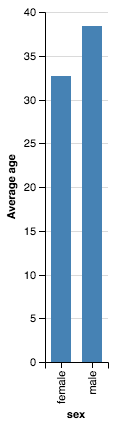

In [27]:
# YOUR CODE HERE
Chart(titanic).mark_bar().encode(
    X('sex'),
    Y('average(age)', title = 'Average age')
)

Compute the mean and standard deviation of the `age` column, grouped by the `sex` and `alive` columns. How did age and sex play a role in who survived?

In [28]:
# YOUR CODE HERE
g2 = titanic.groupby(['sex','alive'])['age'].aggregate(['mean', 'std'])
g2

mean        std
sex    alive                      
female no     27.500000  23.175418
       yes    33.054878  13.510400
male   no     42.849057  14.309285
       yes    32.607805  17.506299

In [29]:
assert list(g2.columns)==['mean', 'std']
assert [list(i) for i in list(g2.index.levels)]==[['female', 'male'],['no', 'yes']]

Create an Altair visualization that shows the same information as this groupby:

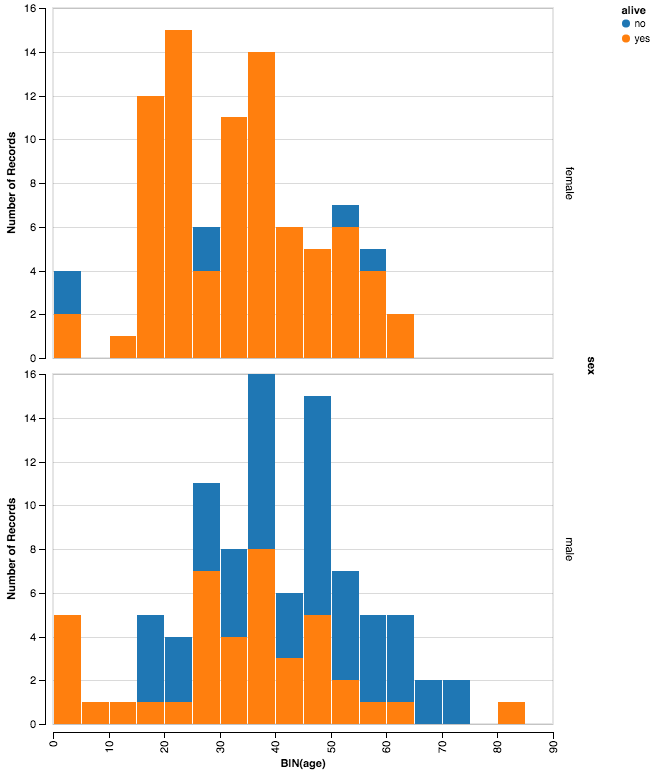

In [35]:
# YOUR CODE HERE
# NOT FINISHED
Chart(titanic).mark_bar().encode(
    X('age:Q', bin=Bin(maxbins=30)),
    Y('count(age)'),
    Color('alive'),
    Row('sex')
)

## Looking at a categorical variable

Use `value_counts` to count the number of people who where alone, grouped by `sex` and `alive`. Unstack the result.

In [31]:
# YOUR CODE HERE
g3 = titanic.groupby(['sex', 'alive', 'alone'])['alone'].count().unstack()
#g3 = cars.groupby(['Year','Cylinders'])['Cylinders'].sum().unstack()
g3

alone         False  True 
sex    alive              
female no         4      2
       yes       52     30
male   no        25     28
       yes       23     18

In [32]:
assert list(g3.columns)==[False, True]
assert [list(i) for i in list(g3.index.levels)]==[['female', 'male'],['no', 'yes']]

Create an Altair visualization that shows the same information as this groupby:

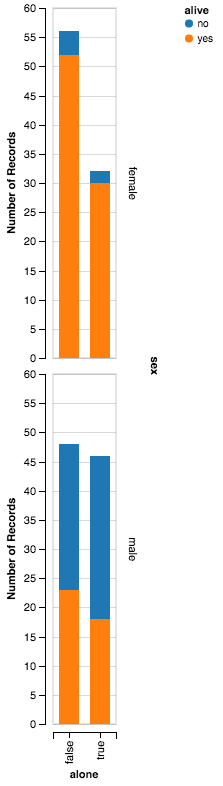

In [37]:
# YOUR CODE HERE
Chart(titanic).mark_bar().encode(
    X('alone'),
    Y('count(age)'),
    Color('alive'),
    Row('sex')
)